In [30]:
import pandas as pd

In [44]:
df=pd.read_csv(r"C:\Users\supriya shrivastv\PycharmProjects\Projects\Dataset\twitter_scrapped.csv")
df.head()

,id,name,userName,description,followers
0,13298072,Tesla,Tesla,"Electric vehicles, giant batteries & solar, AI...",22825425
1,326041545,Mahindra Last Mile Mobility,MahindraLMM,"Mahindra LMM Ltd is a subsidiary of M&M, respo...",41533
2,142325969,Electric Vehicles Research,EV_Research,Electric Vehicles Research - Truly Global Dail...,39476
3,1172815244785147904,Ampere Electric Vehicles,ampere_ev,For the ones who #TakeCharge. Introducing a hi...,8821
4,956202786336788481,Octopus Electric Vehicles,OctopusEV,EV leasing. Salary sacrifice specialists. Like...,10823


In [45]:
df.shape

(120, 5)

In [27]:
import re
import nltk
from textblob import TextBlob
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\supriya
[nltk_data]     shrivastv\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [46]:
df.drop(['name','userName','followers'],axis=1,inplace=True)

In [47]:
df.head()

,id,description
0,13298072,"Electric vehicles, giant batteries & solar, AI..."
1,326041545,"Mahindra LMM Ltd is a subsidiary of M&M, respo..."
2,142325969,Electric Vehicles Research - Truly Global Dail...
3,1172815244785147904,For the ones who #TakeCharge. Introducing a hi...
4,956202786336788481,EV leasing. Salary sacrifice specialists. Like...


# Cleaning of text

In [48]:
df.dropna(inplace=True)

In [49]:
cleaned_text=[]
for tweet in df['description']:
    text=re.sub('[^a-zA-Z]', ' ',tweet)
    text=text.lower()
    cleaned_text.append(text)
df['cleaned_text']=cleaned_text
df.head()

,id,description,cleaned_text
0,13298072,"Electric vehicles, giant batteries & solar, AI...",electric vehicles giant batteries solar ai...
1,326041545,"Mahindra LMM Ltd is a subsidiary of M&M, respo...",mahindra lmm ltd is a subsidiary of m m respo...
2,142325969,Electric Vehicles Research - Truly Global Dail...,electric vehicles research truly global dail...
3,1172815244785147904,For the ones who #TakeCharge. Introducing a hi...,for the ones who takecharge introducing a hi...
4,956202786336788481,EV leasing. Salary sacrifice specialists. Like...,ev leasing salary sacrifice specialists like...


# Sentiment Analysis

In [50]:
df[['polarity','subjectivity']]=df["cleaned_text"].apply(lambda text: pd.Series(TextBlob(text).sentiment))
for index,row in df.iterrows():
    score=SentimentIntensityAnalyzer().polarity_scores(df['cleaned_text'][index])
    neg=score['neg']
    pos=score['pos']
    neu=score['neu']
    comp=score['compound']
    if comp <= -0.05:
        df.loc[index, 'sentiment'] = "negative"
    elif comp >= 0.05:
        df.loc[index, 'sentiment'] = "positive"
    else:
        df.loc[index, 'sentiment'] = "neutral"
    df.loc[index, 'neg'] = neg
    df.loc[index, 'pos'] = pos
    df.loc[index,'neu']=neu
    df.loc[index, 'comp'] = comp
df.head()

,id,description,cleaned_text,polarity,subjectivity,sentiment,neg,pos,neu,comp
0,13298072,"Electric vehicles, giant batteries & solar, AI...",electric vehicles giant batteries solar ai...,0.000000,1.000000,neutral,0.0,0.000,1.000,0.0000
1,326041545,"Mahindra LMM Ltd is a subsidiary of M&M, respo...",mahindra lmm ltd is a subsidiary of m m respo...,0.033333,0.338889,positive,0.0,0.095,0.905,0.3182
2,142325969,Electric Vehicles Research - Truly Global Dail...,electric vehicles research truly global dail...,0.000000,0.000000,positive,0.0,0.225,0.775,0.4404
3,1172815244785147904,For the ones who #TakeCharge. Introducing a hi...,for the ones who takecharge introducing a hi...,0.148182,0.497273,neutral,0.0,0.000,1.000,0.0000
4,956202786336788481,EV leasing. Salary sacrifice specialists. Like...,ev leasing salary sacrifice specialists like...,0.000000,0.350000,positive,0.0,0.262,0.738,0.7783


# Sentiment Visualisation

<Axes: xlabel='sentiment'>

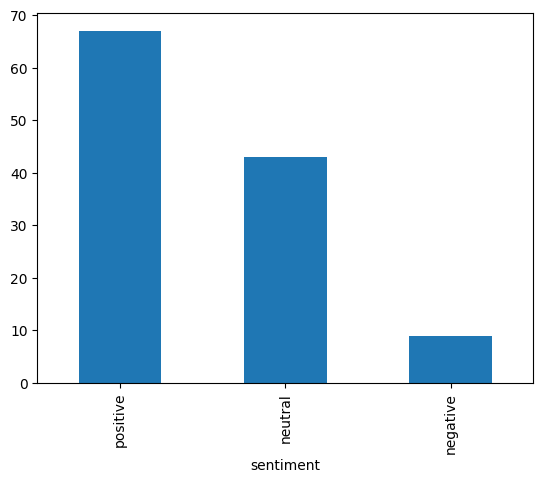

In [52]:
df['sentiment'].value_counts().plot(kind='bar')

In [60]:
total=df['sentiment'].value_counts(dropna=False)
percentage=(round(df['sentiment'].value_counts(dropna=False,normalize=True),2))*100
df2=pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
df2

,Total,Percentage
sentiment,,
positive,67,56.0
neutral,43,36.0
negative,9,8.0


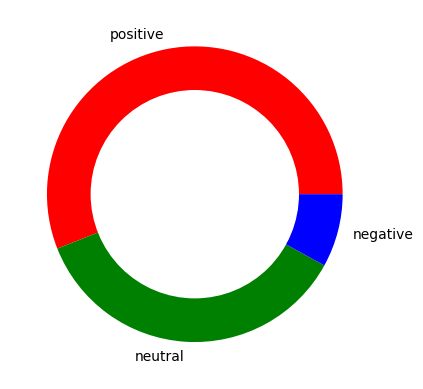

In [61]:
size=df2['Percentage']
value=df2.index
circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=value, colors=['red','green','blue'])
p=plt.gcf() #gcf=get current figure
p.gca().add_artist(circle)#gca=get current axis
plt.show()

In [63]:
Stopwords=stopwords.words('english')

In [62]:
text=''.join(text for text in df['cleaned_text'])
print("{} total words".format(len(text)))

14605 total words


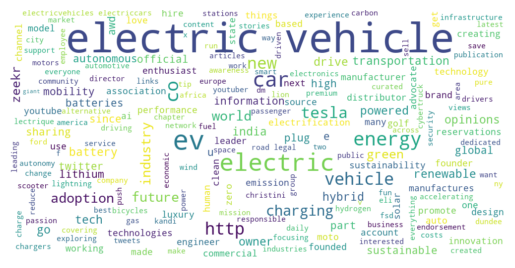

In [67]:
wc=WordCloud(stopwords=Stopwords,background_color='white',width=1000,height=500).generate(text)
plt.imshow(wc ,interpolation='bilinear')
plt.axis("off")
plt.show()

In [68]:
wc.to_file(r"C:\Users\supriya shrivastv\PycharmProjects\Projects\Output\wordcloud.png")

In [69]:
img=Image.open(r"C:\Users\supriya shrivastv\PycharmProjects\Projects\Dataset\Car.jpg")

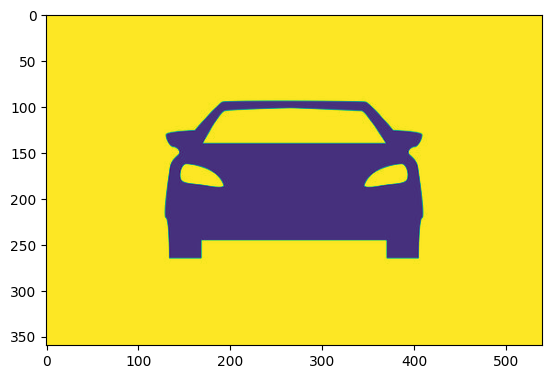

In [77]:
plt.imshow(img)

In [71]:
mask=np.array(img)
print(mask)
print(mask.shape)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
(360, 540)


In [72]:
def transform(val):
    if val==0:
        return 255
    else:
        return val

In [74]:
transformed_mask=np.ndarray((mask.shape[0],mask.shape[1]),np.int32)
for i in range( len(mask)):
    transformed_mask[i]=list(map(transform,mask[i]))

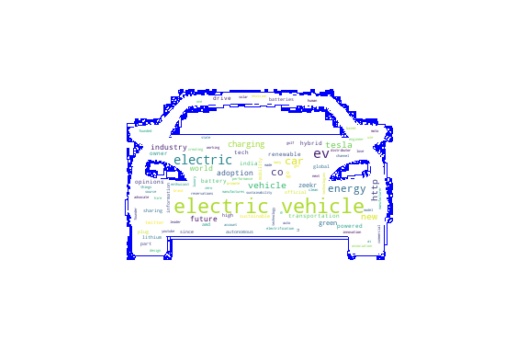

In [80]:
wc=WordCloud(stopwords=Stopwords,background_color='white',width=1500,height=1000,mask=transformed_mask,contour_width=1,contour_color="blue").generate(text)
wc.to_file("Wordcloud_mask.jpg")
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.show()